<a href="https://colab.research.google.com/github/natanascimento/image-processing/blob/task%2Ffourier/Filtragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
h1 = 1/9 * np.ones((3,3), dtype="int")

In [27]:
mickey_minnie = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/mickeyMinnie.png"
messi = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/messi.jpg"
peter_quill = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/imgPeterQuill.jpg"
original = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/original.jpg"

In [ ]:
figure_size = 9

# Passa-baixa: Média

In [13]:
image = cv2.imread(mickey_minnie)

In [15]:
new_image = cv2.blur(image, (figure_size, figure_size))

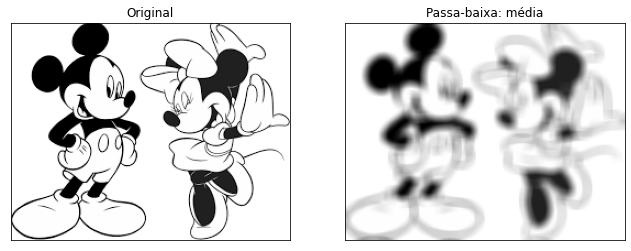

In [16]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title("Passa-baixa: média")

plt.show()

# Passa-baixa não-linear: Mediana

In [19]:
image = cv2.imread(mickey_minnie)

In [20]:
median = cv2.medianBlur(image, figure_size)

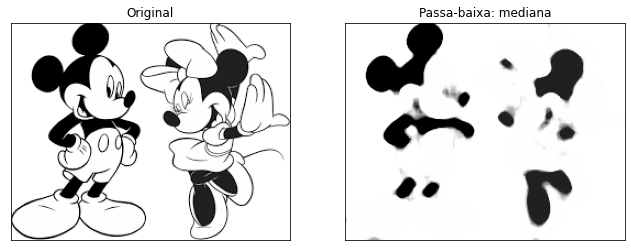

In [21]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(median)
plt.xticks([])
plt.yticks([])
plt.title("Passa-baixa: mediana")

plt.show()

# Passa-alta Sobel: Realçar as boardas e deixa o fundo preto



In [22]:
image = cv2.imread(mickey_minnie)

In [24]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelxy = cv2.Sobel(image, cv2.CV_64F, 1, 1)

Imagem Original


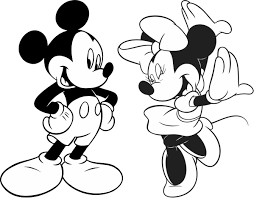


Passa-alta: Sobel


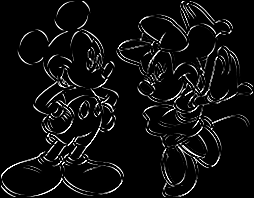

In [25]:
print("Imagem Original")
cv2_imshow(image)

print("")

print("Passa-alta: Sobel")
cv2_imshow(sobelxy)

# Filtragem de Domínio

## Correlação



In [52]:
image = cv2.imread(original, 0)

In [53]:
def correlation(img, img_corr, mascara):
  img_correlacao = np.zeros(np.array(img.shape) + np.array(mascara.shape) - 1)
  for x in range(mascara.shape[0]):
    for y in range(mascara.shape[1]):
      img_correlacao[x:x + img.shape[0], y:y + img.shape[1]] += img*mascara[x,y]
      return img_correlacao.astype("uint8")

In [54]:
img_correlation = cv2.imread(original, 0)

In [55]:
mascara = np.ones((3,3), dtype="int")

In [56]:
image_corr = correlation(image, img_correlation, mascara)

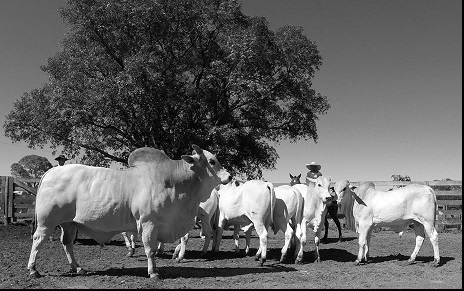

In [57]:
cv2_imshow(image_corr)

## Convolução

In [65]:
image = cv2.imread(original, 0)

In [66]:
def rotate_180(image):
  size_image = image.shape
  lines = size_image[0]
  columns = size_image[1]

  new_image = np.zeros((lines, columns))

  for line in range(0, lines):
    for column in range(0, columns):
      new_image[((lines-1) - line), ((columns-1) - column)] = image[line, column]
  return new_image

In [67]:
def get_slice(point, size, image):
  delta = int(size/2)
  a = (point[0] - delta)
  b = (point[1] - delta)
  return image[a:(a+size), b:(b+size)]

In [83]:
def convolution(image, mask):
  size_image = image.shape
  lines = size_image[0]
  columns = size_image[1]

  size_mascara = mask.shape
  lines_mask = size_mascara[0]
  columns_mask = size_mascara[1]

  new_image = np.zeros(size_image)

  delta = int(lines_mask/2)

  for line in range(0+delta, lines-delta):
    for column in range(0+delta, columns-delta):
      slice_image = get_slice((line, column), lines_mask, image)
      mask_180 = rotate_180(mask)
      new_line_column = np.sum(slice_image * mask_180)
      new_image[line, column] = new_line_column
  return new_image

In [84]:
mask = np.array([ [-1,0,1], [-2,1,2], [-1,0,1]])

In [85]:
image_cov = convolution(image, mask)

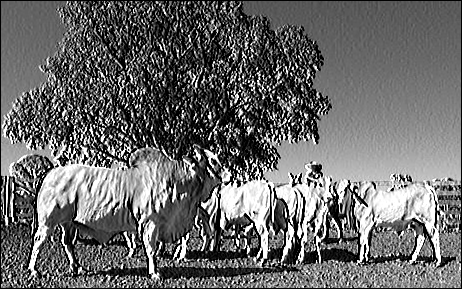

In [86]:
cv2_imshow(image_cov)

# Filtragem de Domínio com Frequência

## Transformada de Fourier

In [107]:
image = cv2.imread(messi)

In [108]:
image_converted = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)

dft = cv2.dft(np.float32(image_converted), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

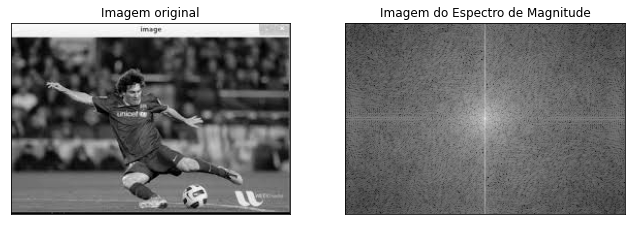

In [109]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image_converted, cmap='gray')
plt.title("Imagem original")

plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Imagem do Espectro de Magnitude")
plt.xticks([])
plt.yticks([])

plt.show()

In [116]:
rows, cols = image_converted.shape
crow, ccol = (rows//2, cols//2)

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift = dft_shift * mask
i_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(i_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

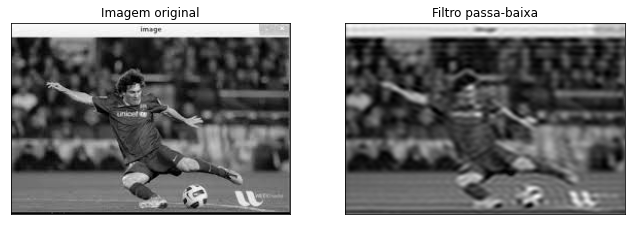

In [118]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(image_converted, cmap='gray')
plt.title("Imagem original")

plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title("Filtro passa-baixa")
plt.xticks([])
plt.yticks([])

plt.show()